___
<img style="float: right; margin: 15px 15px 15px 15px;" src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fassets-global.website-files.com%2F5e5d43546b94f97f39c228fa%2F62f4ee3b1b9187fdf2f03923_How_to_Write_a_Movie_Review__Step-by-Step_Guide.png&f=1&nofb=1&ipt=c0d6c1b5f79bba90a6b43bf0240e8edb7414d5fdb6c7cd9599cc5c4168b922fa" width="300px" height="180px" />


# <font color= #bbc28d> **Sentiment Analysis in Movies IMDb** </font>
#### <font color= #2E9AFE> `Project 1 – Text Mining`</font>
- <Strong> Sofía Maldonado, Diana Valdivia & Viviana Toledo </Strong>
- <Strong> Fecha </Strong>: 28/09/2025 

___

<p style="text-align:right;"> Imagen recuperada de: https://essaypro.com/blog/movie-review</p>

In [1]:
# Basic Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# For tokenization
import nltk 
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, wordnet, WordNetLemmatizer
import string

# For vectorizing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# <font color= #bbc28d> **Preprocessing** </font>

In [2]:
nltk.download("stopwords")
nltk.download("punkt_tab")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\diana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\diana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv('imdb_reviews.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
# Tools for pre-processing
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
lemmatizer = WordNetLemmatizer()

In [5]:
# Function for making the tokens. Takes into account that words are not punctuation, stop words, lemmatizing AND if they are fully uppercase which may be important to know
def making_tokens(text: str):
    text = text.replace('<br />', " ") # Removing line break characters so they aren't counted as tokens
    tokens = word_tokenize(text)
    processed = []
    for i in tokens:
        if i.lower() not in stop_words and i not in punctuation:
            if i.isupper() and len(i) > 1:
                processed.append(i.lower() + '_UPPER') # Because a word being all uppercase (like "us" vs "US") can be relevant information.
            else:
                processed.append(lemmatizer.lemmatize(i.lower()))
    
    return processed

In [6]:
df['tokens'] = df['review'].apply(making_tokens)

In [7]:
df

,review,sentiment,tokens
0,One of the other reviewers has mentioned that ...,positive,"[one, reviewer, mentioned, watching, 1, oz, ep..."
1,A wonderful little production. <br /><br />The...,positive,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,"[basically, 's, family, little, boy, jake, thi..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, 's, ``, love, time, money, ''..."
...,...,...,...
49995,I thought this movie did a down right good job...,positive,"[thought, movie, right, good, job, n't, creati..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"[bad, plot, bad, dialogue, bad, acting, idioti..."
49997,I am a Catholic taught in parochial elementary...,negative,"[catholic, taught, parochial, elementary, scho..."
49998,I'm going to have to disagree with the previou...,negative,"['m, going, disagree, previous, comment, side,..."


In [8]:
# Since the original dataset is said to have 25,000 train and 25,000 test reviews, the splits will be 50-25-25 for train-dev-test respectively

x = df['tokens']
y = df['sentiment']

X_train, X_temp, Y_train, Y_temp = train_test_split(x, y, test_size=0.5, random_state=42)

X_dev, X_test, Y_dev, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

print(f"Train dataset size: {X_train.shape[0]} reviews")
print(f"Dev dataset size: {X_dev.shape[0]} reviews")
print(f"Test dataset size: {X_test.shape[0]} reviews")

Train dataset size: 25000 reviews
Dev dataset size: 12500 reviews
Test dataset size: 12500 reviews


In [9]:
# Turns the lists of tokens into singular strings of words, to work with in the models
X_train_text = X_train.apply(lambda x: " ".join(x))
X_dev_text = X_dev.apply(lambda x: " ".join(x))
X_test_text = X_test.apply(lambda x: " ".join(x))

# <font color= #bbc28d> **Feature Extraction** </font>

In [11]:
# CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,3), max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train_text)

X_dev_vectorized = vectorizer.transform(X_dev_text)
X_test_vectorized = vectorizer.transform(X_test_text)

In [12]:
ngrams = vectorizer.get_feature_names_out()
#print(ngrams[:50])

row = X_train_vectorized[0].toarray().ravel()
present_ngrams = [ngrams[i] for i in range(len(ngrams)) if row[i] > 0]
print(present_ngrams)

['act', 'act like', 'actor', 'actor film', 'actor movie', 'african', 'air', 'also', 'although', 'always', 'awful', 'bad', 'baker', 'based', 'best', 'book', 'boring', 'campy', 'character', 'charm', 'cheesy', 'cia_upper', 'compared', 'completely', 'computer', 'constantly', 'contact', 'could', 'creature', 'dangerous', 'daughter', 'day', 'deeply', 'dialogue', 'diamond', 'direction', 'disappointed', 'disaster', 'discover', 'eccentric', 'effect', 'end', 'enjoyable', 'enough', 'escape', 'especially', 'even', 'film', 'film plot', 'former', 'freak', 'function', 'go', 'horror', 'hudson', 'in', 'in law', 'including', 'joe', 'john', 'jones', 'king', 'lacked', 'large', 'laura', 'law', 'life', 'like', 'looking', 'lost', 'michael', 'mine', 'missile', 'morality', 'movie', 'movie also', 'movie even', 'nothing', 'novel', 'often', 'one', 'one worst', 'pathetic', 'picture', 'plain', 'plot', 'powerful', 'problem', 'production', 'prof', 'punch', 'pure', 'quality', 'quest', 'reminded', 'ridiculous', 'rocky',

# <font color= #bbc28d> **1. Logistic Regression** </font>
Using the pre-processed data, we will now perform 3 different models to see which one is better at sentiment analysis:

In [16]:
### LOGISITC REGRESSION
lr = LogisticRegression(max_iter=5000, solver='saga', C=0.2, warm_start=True, random_state=42)
lr.fit(X_train_vectorized, Y_train)

LogisticRegression(C=0.2, max_iter=5000, random_state=42, solver='saga',
                   warm_start=True)

              precision    recall  f1-score   support

    negative     0.8862    0.8707    0.8784      6334
    positive     0.8695    0.8852    0.8773      6166

    accuracy                         0.8778     12500
   macro avg     0.8779    0.8779    0.8778     12500
weighted avg     0.8780    0.8778    0.8778     12500



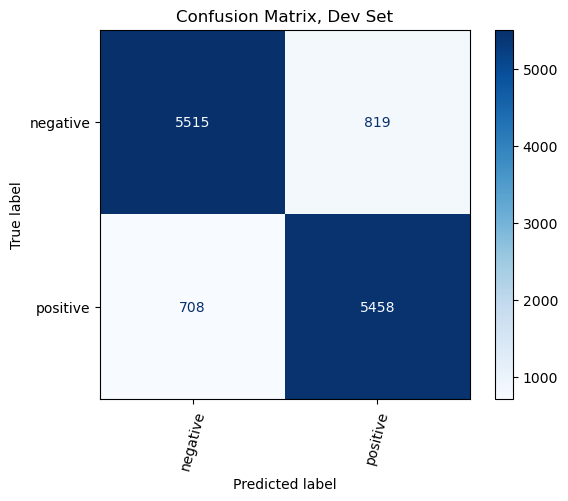

In [17]:
# Realizar predicciones
Y_dev_pred = lr.predict(X_dev_vectorized)

# Matriz y reporte de confusion
cm = confusion_matrix(Y_dev, Y_dev_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation = 75)
plt.title("Confusion Matrix, Dev Set")
print(classification_report(Y_dev, Y_dev_pred, digits=4))
plt.show()

              precision    recall  f1-score   support

    negative     0.8770    0.8676    0.8723      6149
    positive     0.8731    0.8822    0.8777      6351

    accuracy                         0.8750     12500
   macro avg     0.8751    0.8749    0.8750     12500
weighted avg     0.8751    0.8750    0.8750     12500



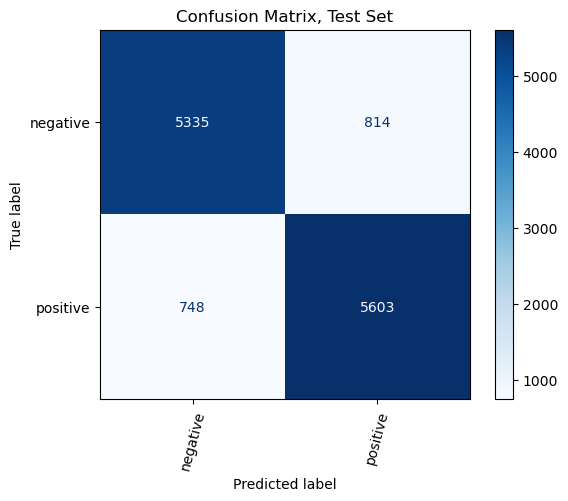

In [18]:
# Realizar predicciones
Y_test_pred = lr.predict(X_test_vectorized)

# Matriz y reporte de confusión
cm = confusion_matrix(Y_test, Y_test_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation = 75)
plt.title("Confusion Matrix, Test Set")
print(classification_report(Y_test, Y_test_pred, digits=4))
plt.show()

In [19]:
# Crear un mask de las predicciones erróneas
wrong_mask = (Y_test != Y_test_pred)

#Seleccionr el texto original
X_test_original = df.loc[X_test.index, 'review']  # raw text for dev set

# DF final
misclassified_df = pd.DataFrame({
    "original_text": X_test_original[wrong_mask],
    "true_label": Y_test[wrong_mask],
    "predicted_label": Y_test_pred[wrong_mask]
})

misclassified_df.head()

,original_text,true_label,predicted_label
21768,Why a good actress like Elizabeth Berkley star...,positive,negative
42560,"God cuts himself with a straight razor, afterw...",positive,negative
17949,I just saw Adam Had Four Sons for the first ti...,negative,positive
611,The tourist season has just ended on a remote ...,positive,negative
44149,This documentary focuses on the happenings in ...,positive,negative


# <font color= #bbc28d> **2. Naive Bayes** </font>
To have a better model of naive bayes, we will do a slight change, even though `CountVectorizer` would help more in the **NB** model, we also saw works where a `TfidVectorizer` could help improve the metrics, also we will increase the number of features and the min_df:

In [10]:
# Crear objeto [Tal vez pueda ayudar a mejorar el rendimiento del modelo]
vectorizer2 = TfidfVectorizer(
    ngram_range=(1,3),
    max_features=50000,     
    min_df=3,               
)

# Aplicar transformaciones
X_train_vectorized2 = vectorizer2.fit_transform(X_train_text)
X_dev_vectorized2 = vectorizer2.transform(X_dev_text)
X_test_vectorized2 = vectorizer2.transform(X_test_text)

Now let´s do the model as planned:

In [11]:
### Naive Bayes
nb = MultinomialNB(alpha=0.2) 
nb.fit(X_train_vectorized2, Y_train)

MultinomialNB(alpha=0.2)

Let´s see if the params we choose improved the model:

              precision    recall  f1-score   support

    negative     0.8899    0.8668    0.8782      6334
    positive     0.8667    0.8899    0.8781      6166

    accuracy                         0.8782     12500
   macro avg     0.8783    0.8783    0.8782     12500
weighted avg     0.8785    0.8782    0.8782     12500



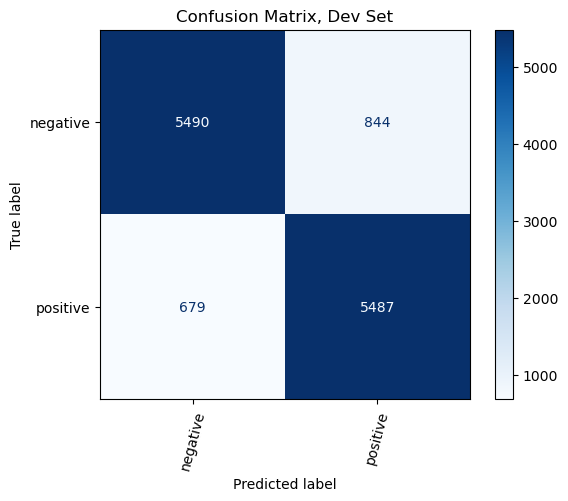

In [25]:
Y_dev_pred = nb.predict(X_dev_vectorized2)

cm = confusion_matrix(Y_dev, Y_dev_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=nb.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation = 75)
plt.title("Confusion Matrix, Dev Set")
print(classification_report(Y_dev, Y_dev_pred, digits=4))
plt.show()

Since we are happy with the results, let´s try it on the test set:

              precision    recall  f1-score   support

    negative     0.8900    0.8623    0.8759      6149
    positive     0.8705    0.8969    0.8835      6351

    accuracy                         0.8798     12500
   macro avg     0.8803    0.8796    0.8797     12500
weighted avg     0.8801    0.8798    0.8798     12500



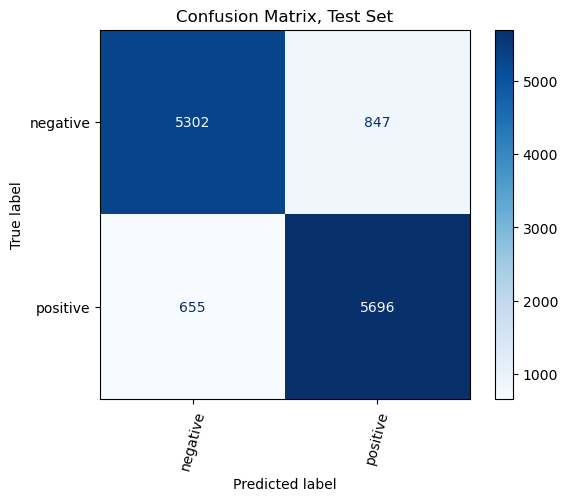

In [12]:
Y_test_pred = nb.predict(X_test_vectorized2)

cm = confusion_matrix(Y_test, Y_test_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=nb.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation = 75)
plt.title("Confusion Matrix, Test Set")
print(classification_report(Y_test, Y_test_pred, digits=4))
plt.show()

In [13]:
# Crear un mask de las predicciones erróneas
wrong_mask = (Y_test != Y_test_pred)

#Seleccionr el texto original
X_test_original = df.loc[X_test.index, 'review']  # raw text for dev set

# DF final
misclassified_df = pd.DataFrame({
    "original_text": X_test_original[wrong_mask],
    "true_label": Y_test[wrong_mask],
    "predicted_label": Y_test_pred[wrong_mask]
})

misclassified_df.head()

,original_text,true_label,predicted_label
21768,Why a good actress like Elizabeth Berkley star...,positive,negative
46174,i got to see the whole movie last night and i ...,positive,negative
31080,You have to hand it to writer-director John Hu...,negative,positive
17949,I just saw Adam Had Four Sons for the first ti...,negative,positive
43224,I agree with one of the other comment writers ...,negative,positive


# <font color= #bbc28d> **3. Support Vector Classifier** </font>

Using the first vectorization:

In [13]:
svc = SVC(kernel='rbf', gamma=0.001, C=5)

svc.fit(X_train_vectorized, Y_train)

SVC(C=5, gamma=0.001)

              precision    recall  f1-score   support

    negative     0.8976    0.8731    0.8852      6334
    positive     0.8732    0.8977    0.8852      6166

    accuracy                         0.8852     12500
   macro avg     0.8854    0.8854    0.8852     12500
weighted avg     0.8855    0.8852    0.8852     12500



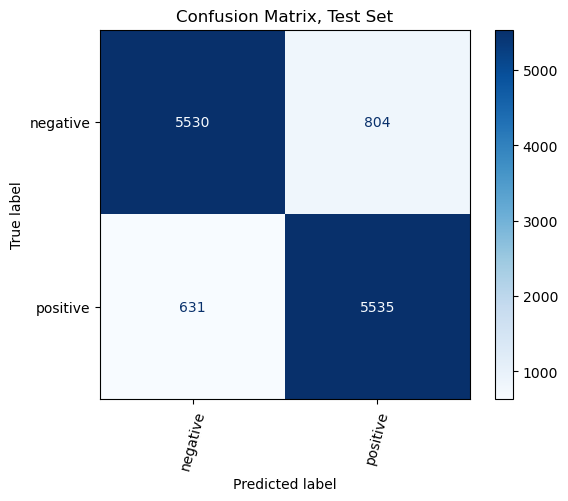

In [14]:
y_dev_pred3 = svc.predict(X_dev_vectorized)

cm = confusion_matrix(Y_dev, y_dev_pred3)
disp = ConfusionMatrixDisplay(cm, display_labels=svc.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation = 75)
plt.title("Confusion Matrix, Test Set")
print(classification_report(Y_dev, y_dev_pred3, digits=4))
plt.show()

Using the second vectorization:

In [ ]:
svc2 = SVC(kernel='rbf', gamma='scale', C=1)

svc2.fit(X_train_vectorized2, Y_train)

SVC(C=1)

              precision    recall  f1-score   support

    negative     0.9162    0.8859    0.9008      6334
    positive     0.8866    0.9168    0.9015      6166

    accuracy                         0.9011     12500
   macro avg     0.9014    0.9013    0.9011     12500
weighted avg     0.9016    0.9011    0.9011     12500



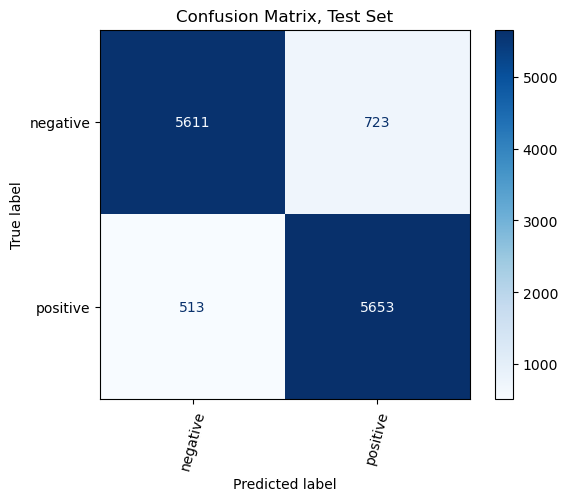

In [ ]:
y_dev_pred3 = svc2.predict(X_dev_vectorized2)

cm = confusion_matrix(Y_dev, y_dev_pred3)
disp = ConfusionMatrixDisplay(cm, display_labels=svc2.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation = 75)
plt.title("Confusion Matrix, Test Set")
print(classification_report(Y_dev, y_dev_pred3, digits=4))
plt.show()

Since we got better results, we will proceed to evaluate with the test set:

              precision    recall  f1-score   support

    negative     0.9124    0.8758    0.8937      6149
    positive     0.8842    0.9186    0.9011      6351

    accuracy                         0.8975     12500
   macro avg     0.8983    0.8972    0.8974     12500
weighted avg     0.8981    0.8975    0.8974     12500



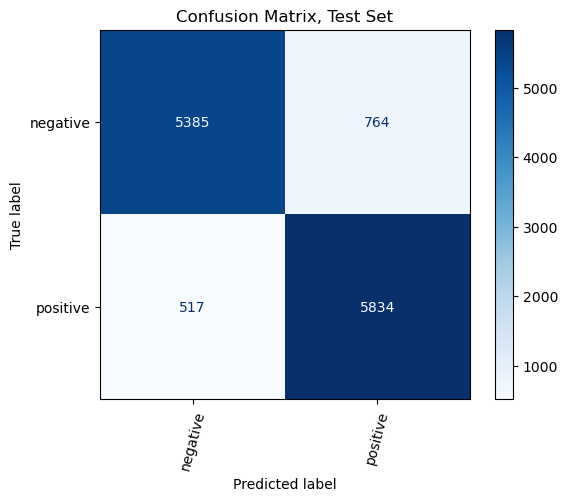

In [ ]:
y_test_pred3 = svc2.predict(X_test_vectorized2)

cm = confusion_matrix(Y_test, y_test_pred3)
disp = ConfusionMatrixDisplay(cm, display_labels=svc2.classes_)
disp.plot(cmap='Blues')
plt.xticks(rotation = 75)
plt.title("Confusion Matrix, Test Set")
print(classification_report(Y_test, y_test_pred3, digits=4))
plt.show()